In [1]:
# The notebook's environment might not recognise local installs of ADRpy, fix that now...
import os, sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..\\src")))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ADRpy import unitconversions as co
from ADRpy import constraintanalysis as ca
from ADRpy import atmospheres as at
from ADRpy import propulsion as pdecks

In [89]:
designbrief = {
    "groundrun_m": 2500,
    "climbrate_fpm": 2940,
    "cruisespeed_ktas": 518, "cruisealt_m": co.ft_m(35e3),
    "servceil_m": co.ft_m(36.1e3),
}
# Dictionary parameters below this comment are guesses that make
# the constraint curves look good, would be nice to verify these
designbrief.update({
    "vstallclean_kcas": 147,
    "secclimbspd_kias": 157,
    "turnspeed_ktas": 450,
    "stloadfactor": 1.5,
    "cruisethrustfact": 0.9
})

wingspan_m = co.ft_m(108)
wingarea_m2 = co.ft2_m2(1_650)
weight_n = co.kg_N(co.lb_kg(169_000))

designdefinition = {
    "weight_n": weight_n,
    "sweep_le_deg": 32,
    "weightfractions": {"cruise": 0.8, "servceil": 0.75},
    "aspectratio": wingspan_m ** 2 / wingarea_m2,
    "taperratio": 1 / 3
}

designperformance = {
    "CLminD":0.1, "CLmax": 1.4, "CDmin": 0.02,
    "CLmaxTO": 1.5, "CLTO": 0.16
}

In [93]:
B727_100 = ca.AircraftConcept(
    brief=designbrief,
    design=designdefinition,
    performance=designperformance,
    atmosphere=at.Atmosphere(offset_deg=0),
    propulsion=pdecks.EngineDeck("JT8D-9")
)

In [94]:
designloading_pa = weight_n / wingarea_m2
VY_mps = B727_100.get_bestV_Y(designloading_pa)
B727_100.brief.climbspeed_kias = co.mps_kts(VY_mps)

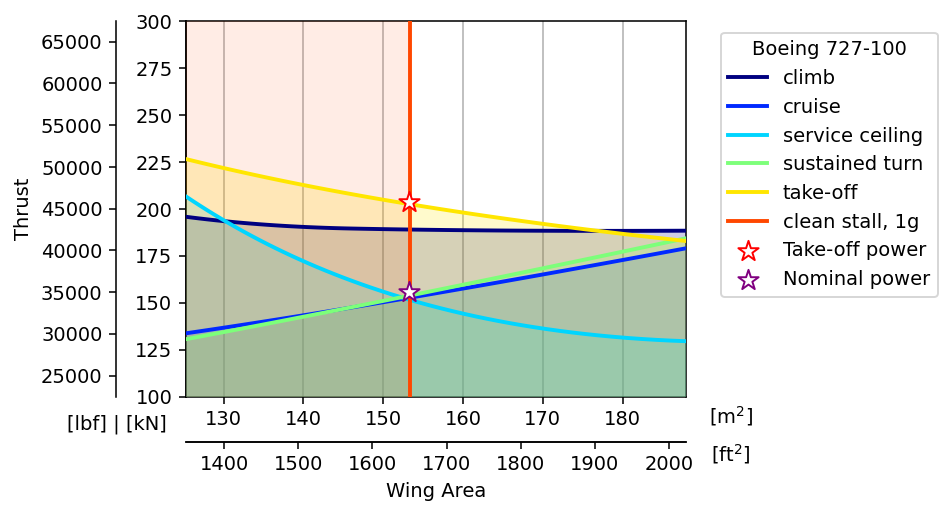

In [95]:
import warnings

with warnings.catch_warnings():
    # Ignore warnings from constraints that couldn't plot
    # warnings.simplefilter("ignore")
    
    fig, ax = B727_100.plot_constraints(
        wingloading_pa=np.linspace(4e3, 6e3),
        methods={"cdi_factor":"Kroo"}
    )

# Mark on the plot, augmented SL static thrust for take-off
thrust_slto_n = B727_100.propulsion.thrust_slto(0) * 3
ax.scatter(
    wingarea_m2, thrust_slto_n,
    marker="*", ec="r", fc="w", s=120,
    label="Take-off power", zorder=20
)

# Mark on the plot, nominal SL static thrust
thrust_n = B727_100.propulsion.thrust(0, 0) * 3
ax.scatter(
    wingarea_m2, thrust_n,
    marker="*", ec="purple", fc="w", s=120,
    label="Nominal power", zorder=20
)

ax.set_ylim(100e3, 300e3)

ax.remake_legend(title="Boeing 727-100");